In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("train.csv")

In [4]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.shape)

(891, 12)


In [6]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().mean()*100   #if a column has 50%+ mean, then we have to either drop the column or change it

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df['Sex'].unique()
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

To Check and replace missing values (We do it my median here)

In [11]:
df['Age'].isnull().sum()

177

In [12]:
median_age =  df["Age"].median()

In [13]:
df["Age"] = df["Age"].fillna(median_age)    #takes the NaN values inside the "Age" column and replaces it with the values given in the parenthesis

In [14]:
df["Age"].isnull().sum()

0

In [15]:
df["Embarked"] = df["Embarked"].fillna("S")

In [16]:
df["Embarked"].isnull().sum()

0

In [17]:
df.drop(columns=["Cabin"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [18]:
df = df.drop_duplicates()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# df["age"].isnull().sum() #finds all the columns which are null and gives the total count
# df.drop_duplicates() #drops the duplicate rows in the entire dataframe where each value of the corresponding columns are same
# df.drop(columns=["age"]) #Drops the column called "Age" from the dataframe, this is only temporary so we have to use inplace="true" to make it permanent
# df.info()  #shows the information about the dataframe, the datatype, rows and columns and even the null or not values
# median_age = df["Age"].median() #finds out the median age in the given column
# df["Age"] = df["Age"].fillna(median_age) #fills the specified column with the given value provided in the parenthesis

In [21]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
df.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [24]:
df.groupby("Sex")["Survived"].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [25]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [26]:
# df["Sex"].count_values
# df.groupby("Age")["Survived"].sum()   adds up all the entries(does the math). if it is of the 0/1 type it adds all the different values
# df.groupby("class")["Survived"].count() it just returns the total values. 
# df.groupby("Sex")["Survived"].mean()   it returns the percentage score of the values

In [27]:
survivalCounts = df["Survived"].value_counts()

Text(0, 0.5, 'No of Passengers')

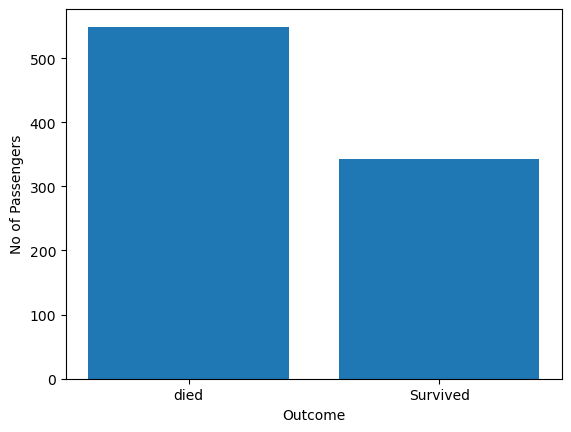

In [28]:
plt.bar(["died","Survived"],survivalCounts)
plt.xlabel("Outcome")
plt.ylabel("No of Passengers")

Survival Rate by Gender

In [29]:
MFSurvived = df.groupby("Sex")["Survived"].mean()

Text(0, 0.5, 'Percentage of People')

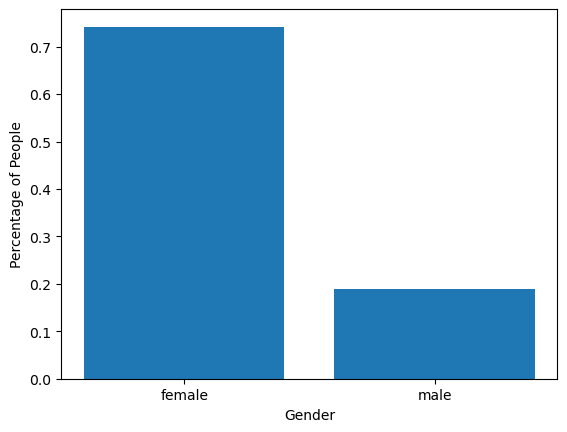

In [30]:
plt.bar(MFSurvived.index,MFSurvived.values)
plt.xlabel("Gender")
plt.ylabel("Percentage of People")

In [31]:
GendersSurvivalByCount = df.groupby("Sex")["Survived"].sum()

Text(0, 0.5, 'Number of People')

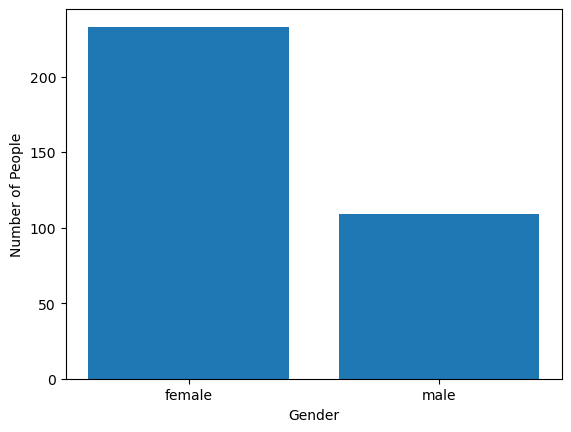

In [32]:
plt.bar(GendersSurvivalByCount.index,GendersSurvivalByCount.values)
plt.xlabel("Gender")
plt.ylabel("Number of People")

In [33]:
# variable = df.groupby("Ball size")["Survived/Black"].sum() to get values
# variable = df.groupby("Ball size")["Survived/Black"].mean() to get percentage
# import matplotlib.pyplot as plt
# plt.bar(labels, values)
# plt.bar(["dead","alive"],DeadAliveCount)
# plt.title("something")
# plt.xlabel("x axis")
# plt.ylabel("Y label")
# plt.show()

In [34]:
class_survival = df.groupby("Pclass")["Survived"].mean()

In [35]:
print(class_survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


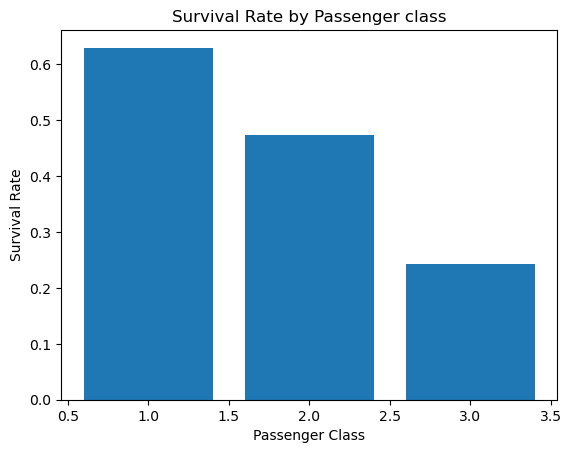

In [36]:
plt.bar(class_survival.index, class_survival.values)
plt.title("Survival Rate by Passenger class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

In [37]:
gender_class_survival = df.groupby(["Sex","Pclass"])["Survived"].mean()

In [38]:
print(gender_class_survival)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [39]:
gender_class_survival = gender_class_survival.unstack()

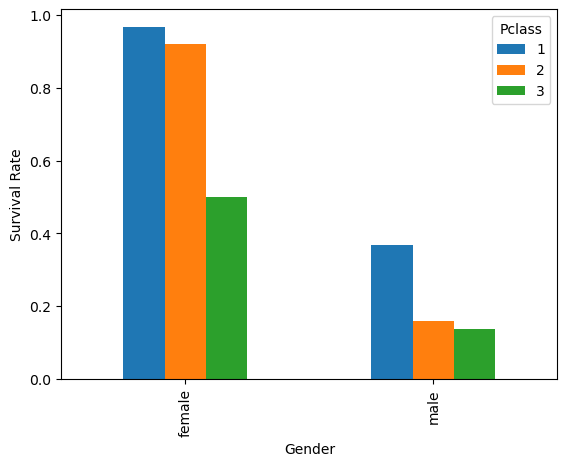

In [40]:
gender_class_survival.plot(kind="bar")
plt.title = "Survival rate by Gender and class"
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

FINDINGS AND OBSERVATIONS

In [41]:
# Females had a much higher survival rate than males.
# Passenger class strongly affected survival; 1st class passengers survived more than 3rd class.
# Female passengers in 1st class had the highest survival rate.
# Male passengers in 3rd class had the lowest survival rate.
# Age had missing values and needed cleaning before analysis.
# Cabin column had too many missing values and was removed.
# Gender and class appear to be strong predictors of survival.

TRAINING THE ML MODEL

In [42]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [43]:
y = df["Survived"]
x = df[["Pclass","Age","Sex"]]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(712, 3)
(712,)
(179, 3)
(179,)


In [46]:
model = LogisticRegression(max_iter=1000)

In [47]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred = model.predict(x_test)

In [49]:
print(y_pred[:10])
print(y_test.values[:10])

[0 0 0 1 1 1 1 0 1 1]
[1 0 0 1 1 1 1 0 1 1]


In [50]:
log_reg_accuracy = accuracy_score(y_test,y_pred)

In [51]:
print(log_reg_accuracy)

0.8100558659217877


In [52]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[91 14]
 [20 54]]


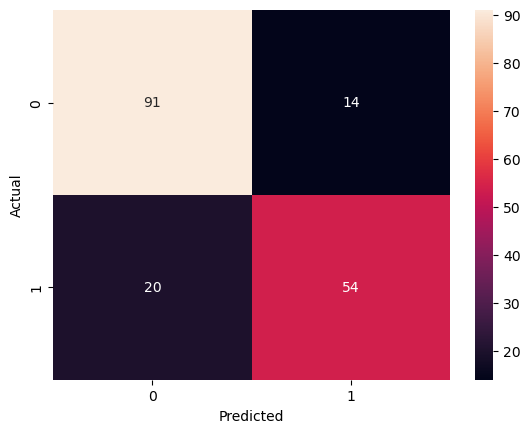

In [53]:
sns.heatmap(matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)

In [56]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [57]:
knn_pred = knn.predict(x_test_scaled)

In [58]:
knn_accuracy_score = accuracy_score(y_test,knn_pred)
print(knn_accuracy_score)

0.7318435754189944


In [59]:
knn_cm = confusion_matrix(y_test,knn_pred)
print(knn_cm)

[[71 34]
 [14 60]]


In [60]:
print("Logistic Regression Accuracy: ", log_reg_accuracy)
print("K Nearest Neighbours Accuracy: ",knn_accuracy_score)

Logistic Regression Accuracy:  0.8100558659217877
K Nearest Neighbours Accuracy:  0.7318435754189944


In [61]:
print(matrix)
print(knn_cm)

[[91 14]
 [20 54]]
[[71 34]
 [14 60]]


FEATURE ENGINEERING

In [62]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  #+1 is to include the passenger themselves

In [63]:
df["IsAlone"] = (df["FamilySize"]==1).astype(int)

In [64]:
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\PRANAV\AppData\Local\Temp\ipykernel_20428\789809431.py:1: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)


In [65]:
df["Title"] = df["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major','Rev', 'Sir', 'Jonkheer', 'Dona'], 'rare')

In [66]:
df["Title"] = df["Title"].replace({'Mlle':'Miss',"Ms":"Miss","mme":"Mrs"})

In [67]:
df["Title"] = df["Title"].map({'Mr': 0,'Miss': 1,'Mrs': 2,'Master': 3,'Rare': 4})

In [68]:
df['Title'] = df['Title'].fillna(4)

In [69]:
x = df[["Pclass","Age",'Sex','FamilySize','IsAlone','Title']]
y = df["Survived"]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
print(x_train.isnull().sum())

Pclass        0
Age           0
Sex           0
FamilySize    0
IsAlone       0
Title         0
dtype: int64


In [72]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [73]:
y_pred = model.predict(x_test)

In [74]:
print("the improved accuracy is: ", accuracy_score(y_test,y_pred))

the improved accuracy is:  0.7932960893854749


In [75]:
test_df = pd.read_csv("test.csv")

In [76]:
# Fill Age
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Encode Sex
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Family features
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

# Extract Title
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Rare'
)
test_df['Title'] = test_df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

test_df['Title'] = test_df['Title'].map({
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4
}).fillna(4)


<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
C:\Users\PRANAV\AppData\Local\Temp\ipykernel_20428\4204062775.py:12: SyntaxWarning: invalid escape sequence '\.'
  test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [77]:
X_kaggle = test_df[['Pclass','Age','Sex','FamilySize','IsAlone','Title']]


In [78]:
kaggle_preds = model.predict(X_kaggle)


In [79]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': kaggle_preds
})

submission.to_csv("submission.csv", index=False)
